In [15]:
#  SK-learn implementation of KNN + K-Fold

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
penguins = sns.load_dataset('penguins').dropna()

In [5]:
le = LabelEncoder()  # Encode categorical data in a numerical format
penguins['sex'] = le.fit_transform(penguins['sex'])
penguins['species'] = le.fit_transform(penguins['species'])
penguins['island'] = le.fit_transform(penguins['island'])

In [6]:
X = penguins.drop('species', axis=1)  # Get Features 
y = penguins['species']  # Get labels

In [7]:
scaler = StandardScaler()  # Scale the feature data 
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [9]:
model = KNeighborsClassifier(n_neighbors=5)  # Create a KNN model
model.fit(X_train, y_train)  # Fit the model to the training data

KNeighborsClassifier()

In [10]:
y_pred = model.predict(X_test)  # Get a predictions vector

In [11]:
# Evaluate model accuracy based on metrics included within SK-learn

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf_matrix)

Accuracy: 0.9818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.95      0.95      0.95        20
           2       1.00      1.00      1.00        38

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110

Confusion Matrix:
 [[51  1  0]
 [ 1 19  0]
 [ 0  0 38]]


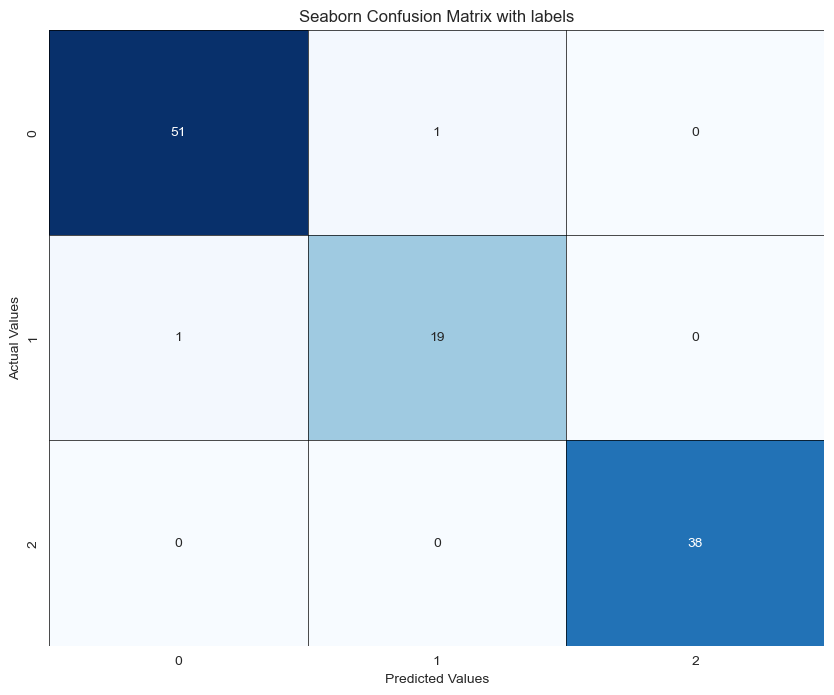

In [12]:
# Plot the Confusion Matrix

plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

num_rows, num_cols = cf_matrix.shape  # Get the number of rows and columns

# Draw horizontal lines
for i in range(num_rows + 1):
    ax.axhline(y=i, color='black', linewidth=0.5)

# Draw vertical lines
for j in range(num_cols + 1):
    ax.axvline(x=j, color='black', linewidth=0.5)

plt.show()

In [13]:
# Conduct K-Fold Cross Validation

# Define the number of folds
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Empty lists to store accuracy scores
accuracy_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    # Split data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the KNN model on the training set for this fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the testing set for this fold
    y_pred = model.predict(X_test_fold)

    # Calculate accuracy score for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)

# Print the average accuracy across all folds
print(f"Average accuracy across {k_folds} folds: {np.mean(accuracy_scores)}")

Average accuracy across 5 folds: 0.9909543193125282


In [16]:
#  Utilize GridSearchCV to find the best hyperparameter K

param_grid = {'n_neighbors': range(1, 31)}  # Testing k from 1 to 30

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the gridsearch model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.9954545454545455
